# Books Dataset

In [2]:
import pandas as pd

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
# Reading the data
books = pd.read_csv('book.csv')
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


## Apriori Algorithm 

### Using different values of support = 0.1, 0.2, 0.5, 0.8
### Using different values of confidence = 0.1, 0.2, 0.5, 0.8


### At minimum support = 0.5 and 0.8, there is no single frequent itemsets created

In [6]:
frequent_items = apriori(books, min_support=0.5, use_colnames=True)
frequent_items.shape
frequent_items

C:\Users\Ridaan\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets


### For min_sup = 0.2, will try different values for support, confidence level and lift while creating association rules

In [7]:
# At minimum support = 0.2, there are only 8 frequent itemsets are created
frequent_items = apriori(books, min_support=0.2, use_colnames=True)
print(frequent_items.shape)
frequent_items

(8, 2)


C:\Users\Ridaan\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [39]:
# Using default metric = 'confidence' and there are only two rules created for any value of minconf <= 0.5 
# 0.5, 0.2, 0.1 = 2 records
# 0.8 = 0 records
# Both have the same lift. So both associations are similar
rules = association_rules(frequent_items, min_threshold=0.5)
print(rules.shape)
rules

(2, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [18]:
# Using metric = 'support' and there are only two rules created for any value of minsupp <= 0.2
# 0.2, 0.1 = 2 records
# 0.5, 0.8 = 0 records
# Both have the same lift. So both associations rules are similar
rules_sup = association_rules(frequent_items, metric='support', min_threshold=0.1)
print(rules_sup.shape)
rules_sup

(2, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [34]:
# Using metric = 'lift' and there are only two rules created for every value of limit = 0.1, 0.2, 0.5, 0.8 till 1.4
# Both have the same lift. So both associations rules are similar
rules_sup = association_rules(frequent_items, metric='lift', min_threshold=1.0)
print(rules_sup.shape)
rules_sup

(2, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


### For min_sup = 0.1, will try different values for support, confidence level and lift while creating association rules


In [19]:
# At minimum support = 0.1, there are only 39 frequent itemsets are created with no limit on max length
frequent_items_1 = apriori(books, min_support=0.1, use_colnames=True)
print(frequent_items_1.shape)
frequent_items_1

(39, 2)


C:\Users\Ridaan\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


###  For min_sup = 0.1 and max_len = 2

In [21]:
# At minimum support = 0.1, there are only 39 frequent itemsets are created 
# and with max length = 2, frequent items set reduced from 39 to 29 as we pruned last 10 records having 3 items.
# Similarly, we can use min_support = 0.05 and 0.01 (100, 594 itemsets are created with max-length = none) 
# and control the no. of itemsets giving limit to max_length of itemsets
frequent_items_2 = apriori(books, min_support=0.1, use_colnames=True, max_len=2)
print(frequent_items_2.shape)
frequent_items_2

(29, 2)


C:\Users\Ridaan\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [25]:
# Default metric='confidence' and different values of threshold = [0.8, 0.5, 0.2, 0.1]
# Eventually, 0.2 and 0.1 are producing same results.
# 0.8 = 1 record
# 0.5 = 16 records
# 0.2, 0.1 = 40 records
for i in [0.8, 0.5, 0.2, 0.1]:
    rules_2 = association_rules(frequent_items_2, min_threshold=i)
    print(i , rules_2.shape)
    # Printing first 5 records
    print(rules_2.sort_values(['confidence'], ascending=False) if rules_2.shape[0]<5 else 
          rules_2.sort_values(['confidence'], ascending=False)[:5])
    

0.8 (1, 10)
  antecedents consequents  antecedent support  consequent support  support  \
0  (ItalCook)   (CookBks)              0.1135               0.431   0.1135   

   confidence      lift  leverage  conviction  zhangs_metric  
0         1.0  2.320186  0.064582         inf        0.64185  
0.5 (16, 10)
   antecedents consequents  antecedent support  consequent support  support  \
12  (ItalCook)   (CookBks)              0.1135               0.431   0.1135   
9     (RefBks)   (CookBks)              0.2145               0.431   0.1525   
6    (GeogBks)  (ChildBks)              0.2760               0.423   0.1950   
4     (RefBks)  (ChildBks)              0.2145               0.423   0.1515   
11   (GeogBks)   (CookBks)              0.2760               0.431   0.1925   

    confidence      lift  leverage  conviction  zhangs_metric  
12    1.000000  2.320186  0.064582         inf       0.641850  
9     0.710956  1.649549  0.060050    1.968556       0.501303  
6     0.706522  1.670264 

In [36]:
# metric='support' and different values of threshold = [0.8, 0.5, 0.2, 0.1]
# 0.8, 0.5 = 0
# 0.2 = 2
# 0.1 = 40
for i in [0.8, 0.5, 0.2, 0.1]:
    rules_3 = association_rules(frequent_items_2, metric='support', min_threshold=i)
    print(i, rules_3.shape)
    print(rules_3.sort_values(['support'], ascending=False) if rules_3.shape[0]<5 else 
          rules_3.sort_values(['support'], ascending=False)[:5])

0.8 (0, 10)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
0.5 (0, 10)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
0.2 (2, 10)
  antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.605201  1.404179  0.073687    1.441240       0.498856  
1    0.593968  1.404179  0.073687    1.421069       0.505870  
0.1 (40, 10)
   antecedents consequents  antecedent support  consequent support  support  \
2   (ChildBks)   (CookBks)               0.423               0.431   0.2560   
3    (CookBks)  (ChildBks)           

In [65]:
# metric=lift and different values of threshold = [1.0, 2.0, 3.0]
# 1.0 = 40
# 2.0 = 2
# 3.0 = 0
for i in [1.0, 2.0, 3.0]:
    rules_4 = association_rules(frequent_items_2, metric='lift', min_threshold=i)
    print(i, rules_4.shape)
    print(rules_4.sort_values(['lift'], ascending=False) if rules_4.shape[0]<5 else 
          print(rules_4.sort_values(['lift'], ascending=False)[:5]))

1.0 (40, 10)
   antecedents consequents  antecedent support  consequent support  support  \
28   (CookBks)  (ItalCook)              0.4310              0.1135   0.1135   
29  (ItalCook)   (CookBks)              0.1135              0.4310   0.1135   
39   (GeogBks)    (ArtBks)              0.2760              0.2410   0.1275   
38    (ArtBks)   (GeogBks)              0.2410              0.2760   0.1275   
37    (RefBks)   (GeogBks)              0.2145              0.2760   0.1105   

    confidence      lift  leverage  conviction  zhangs_metric  
28    0.263341  2.320186  0.064582    1.203406       1.000000  
29    1.000000  2.320186  0.064582         inf       0.641850  
39    0.461957  1.916832  0.060984    1.410667       0.660643  
38    0.529046  1.916832  0.060984    1.537304       0.630179  
37    0.515152  1.866491  0.051298    1.493250       0.591006  
None
2.0 (2, 10)
  antecedents consequents  antecedent support  consequent support  support  \
0   (CookBks)  (ItalCook)        

### Based on the buisness interest, we can choose the appropriate values for minimum spport and confidence 

### Visualizing the association rules through graphs

C:\Users\Ridaan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


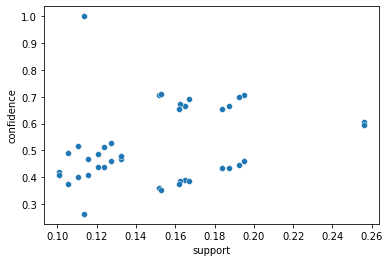

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot('support','confidence',data=rules_3)

plt.show()

In [44]:
rules_3.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
39,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667,0.660643
38,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304,0.630179
37,(RefBks),(GeogBks),0.2145,0.2760,0.1105,0.515152,1.866491,0.051298,1.493250,0.591006
36,(GeogBks),(RefBks),0.2760,0.2145,0.1105,0.400362,1.866491,0.051298,1.309958,0.641209
32,(ArtBks),(DoItYBks),0.2410,0.2820,0.1235,0.512448,1.817192,0.055538,1.472664,0.592491
33,(DoItYBks),(ArtBks),0.2820,0.2410,0.1235,0.437943,1.817192,0.055538,1.350397,0.626324
19,(GeogBks),(YouthBks),0.2760,0.2475,0.1205,0.436594,1.764017,0.052190,1.335627,0.598221
18,(YouthBks),(GeogBks),0.2475,0.2760,0.1205,0.486869,1.764017,0.052190,1.410945,0.575564


In [48]:
# At minimum support = 0.1, there are only 39 frequent itemsets are created with no limit on max length
frequent_items_vis = apriori(books, min_support=0.1, use_colnames=True)
print(frequent_items_vis.shape)
frequent_items_vis

(39, 2)


C:\Users\Ridaan\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [51]:
rules_vis = association_rules(frequent_items_vis, metric='lift', min_threshold=1.0)
print(rules_vis.shape)
rules_vis.sort_values('lift', ascending=False)

(100, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


C:\Users\Ridaan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


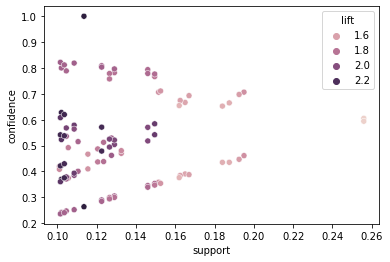

In [60]:
sns.scatterplot('support','confidence',data=rules_vis, hue='lift')

plt.show()

C:\Users\Ridaan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


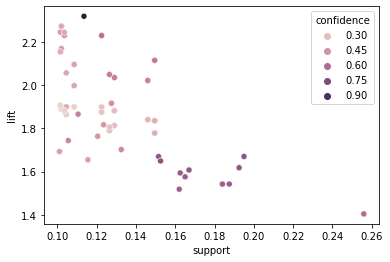

In [63]:
sns.scatterplot('support','lift',data=rules_vis, hue='confidence')

plt.show()

C:\Users\Ridaan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


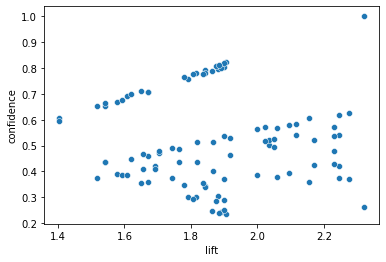

In [64]:
sns.scatterplot('lift','confidence',data=rules_vis)

plt.show()

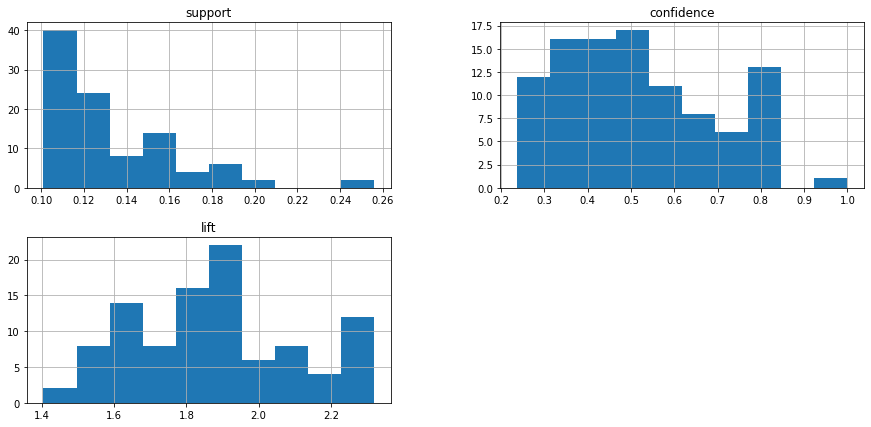

In [61]:
rules_vis[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

### Q. My question is what to interpret from these graphs, since we will be using those association rules who have high values for the chosen metrics like, support, confidence and lift. 

### Q. How to chose which metrics we should use while creating association rules since every chosen metric is giving different results. 